# Task 2 of LetsGrowMore Intern

## Handwritten Digit Recognition using Neural Networks

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.

A neural network works similarly to the human brain’s neural network.

For our project here, we'll use **MNIST** dataset.

The MNIST dataset is an acronym that stands for the **Modified National Institute of Standards and Technology** dataset. It is a dataset of **60,000** small square **28×28** pixel grayscale images of handwritten single digits between **0 and 9**.


In [ ]:
import tensorflow as tf                             
from matplotlib import pyplot as plt                        
import numpy as np
import cv2

#getting the dataset
from keras.datasets import mnist

In [ ]:
#splitting up train and test dataset
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

MNIST has already splitted up into training and testing data set--> 60000 for traing and 10000 for testing

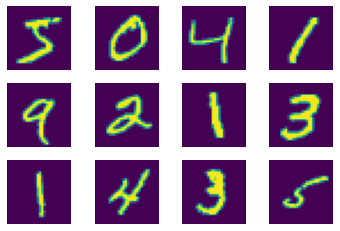

In [ ]:
#Looking at the dataset

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.imshow(X_train[i])
  plt.axis('off')

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

This is how the image looks like --> 28x28 value

## Normalizing data

Now the next step is to normalize the data. The pixel values will be between **0-255**, so we are normalizing the values between **0-1**.

**Data normalization** formats your data to look and read the same across all records in a database.

Here we are normalizing only the input data which are X_train and X_test

In [ ]:
X_train= tf.keras.utils.normalize(X_train,axis=1)
X_test= tf.keras.utils.normalize(X_test,axis=1)

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Creating the model

We'll be using keras **Sequenial model**.
 Sequential groups a linear stack of layers into a tf.keras.Model.

 ![image.png](https://drek4537l1klr.cloudfront.net/chollet/Figures/07fig01.jpg)
 ![image.png](https://miro.medium.com/max/1400/0*1IH67KJadqeqeO01.png)

**Flatten**- flatten() method is used for converting multi-dimensional array into one dimensional flatten array or say single dimensional array. 

**Hidden layer** - a hidden layer is located between the input and output of the algorithm, in which the function applies weights to the inputs and directs them through an activation function as the output.

**Dense**- Keras Dense layer is the layer that contains all the neurons that are deeply connected within themselves. 

This means that every neuron in the dense layer takes the input from all the other neurons of the previous layer. 

We can add as many dense layers as required. It is one of the most commonly used layers.

**Activation**- An Activation Function decides whether a neuron should be activated or not. 

This means that it will decide whether the neuron’s input to the network is important or not in the process of prediction using simpler mathematical operations. 

The role of the Activation Function is to derive output from a set of input values fed to a node (or a layer).

The purpose of an activation function is to add non-linearity to the neural network.

Here we are using **ReLU** which stands for **Rectified Linear Unit**.
The neurons will only be deactivated if the output of the linear transformation is less than 0.

![image](https://www.nomidl.com/wp-content/uploads/2022/04/image-10.png)

And **Softmax**

The softmax also known as **softargmax or normalized exponential** function, is an activation function transforms the raw outputs of the neural network into a vector of probabilities, essentially a probability distribution over the input classes.

It converts a **vector** of K real numbers into a **probability distribution** of K possible outcomes.It is used mostly in the output layer

![image](https://images.deepai.org/glossary-terms/d46d2349c87d4aba8f1668b6543f636c/SoftmaxLayer.svg)

![image](https://miro.medium.com/max/1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg)

**Units**- Units are one of the most basic and necessary parameters of the Keras dense layer which defines the size of the output from the dense layer. It must be a positive integer since it represents the dimensionality of the output vector.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Flatten,Dense
model = keras.Sequential()
#providing input shape in input layer
model.add(tf.keras.Input(shape=(28,28)))
# changing 2D to 1D using flatten
model.add(Flatten())
# model.output_shape --> (None, 784) which is 28x28
model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

Compiling a model is required to finalise the model and make it completely ready to use. For compilation, we need to specify an optimizer and a loss function. 

We can compile a model by using compile attribute.

**Optimier**- Optimizers are Classes or methods used to change the attributes of your machine/deep learning model such as weights and learning rate in order to reduce the losses. Optimizers help to get results faster.


**Loss**- Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater.

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

**SparseCategoricalCrossentropy** Stay organized with collections Save and categorize content based on your preferences. Computes the crossentropy loss between the labels and predictions.

**Metrics**- A metric is a function that is used to judge the performance of your model. Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model.

**Accuracy** is a metric that generally describes how the model performs across all classes. It is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.




In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Fit the model

The Model Fit table provides fit statistics calculated across all of the models. It provides a concise summary of how well the models, with reestimated parameters, fit the data. 

Trains the model for a fixed number of epochs (iterations on a dataset).

**epochs:** Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided


In [ ]:
model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0971 - val_accuracy: 0.9742
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0848 - val_accuracy: 0.9772
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0865 - val_accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0188 - accuracy: 0.9937 - val_loss: 0.1264 - val_accuracy: 0.9742
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0980 - val_accuracy: 0.9776


Accuracy is better and loss is also very less which is good!

## Saving the model

In [ ]:
model.save('digit_recoginizer.model')

## Checking the predictions

Let's check the predictions here

In [ ]:
prediction= model.predict(X_test)
prediction[0]

313/313 [==============================] - 1s 3ms/step


array([7.7608493e-14, 2.3671818e-11, 1.4421680e-12, 2.5210814e-12,
       8.7966933e-14, 2.1866683e-15, 7.2228036e-19, 9.9999994e-01,
       6.2181420e-14, 5.1488240e-09], dtype=float32)

In [ ]:
prediction.shape

(10000, 10)

These are probability values predicted. What we need is a single number which has high probability

We'll use argmax numpy function here.
**Argmax** is a function which gives the index of the greatest number in the given row or column 

In [ ]:
prediction= np.argmax(prediction,axis=1)
prediction[0]

7

We've got the predicted number, now, let's check with actual number.

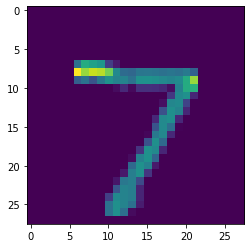

In [ ]:
 plt.imshow(X_test[0])
 

In [ ]:
y_test[0]

7

It's correct!!! Let's check for next numbers also!

Predicted value:  2


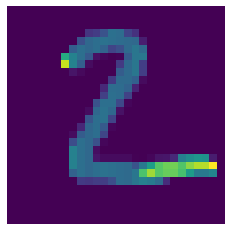

Predicted value:  1


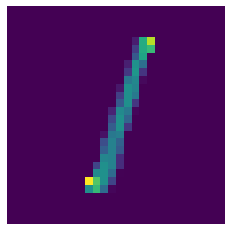

Predicted value:  0


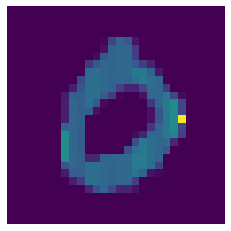

Predicted value:  4


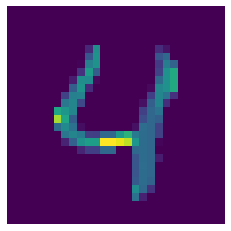

In [ ]:
for i in range(1,5):
  
  print('Predicted value: ',prediction[i])
  display(plt.imshow(X_test[i]))
  plt.axis('off')
  plt.show()

## Making predicts with new images

Let's try with some new images. I've created 5 images from paint with pixels 28x28 and uploaded here. Let's try whether our model is able to predict them.

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

model= load_model('digit_recoginizer.model')

In [ ]:
from google.colab.patches import cv2_imshow
image= cv2.imread('img1.png')
cv2_imshow(image)

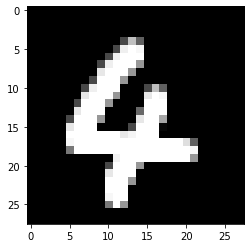

In [ ]:
image= cv2.imread('img1.png')
image=image[:,:,0]
#the actual image is black in white background, but on display we can see the opposite
# hence we need to invert it
image = np.array([image])
plt.imshow(image[0], cmap=plt.cm.binary)
plt.show()


In [ ]:
def convert_img(image):
  #converting the image to 2d --> 28 x 28
  image=image[:,:,0]
  print("Image in 2D")
  cv2_imshow(image)
  #the actual image is black in white background, but on display we can see the opposite
  #changing the image to array and inverting the black and white color to help neural ntk to identify the digits by taking 2's compliment using invert function
  image = np.invert(np.array([image]))
  prediction = model.predict(image)
  prediction=np.argmax(prediction)
  print("Predicted value: ",prediction)


In [ ]:
image= cv2.imread('img1.png')
cv2_imshow(image)
convert_img(image)

Image in 2D


1/1 [==============================] - 0s 21ms/step
Predicted value:  4


In [ ]:
for i in range(1,6):
  image= cv2.imread('img{}.png'.format(i))
  cv2_imshow(image)
  convert_img(image)

Image in 2D


1/1 [==============================] - 0s 16ms/step
Predicted value:  4


Image in 2D


1/1 [==============================] - 0s 17ms/step
Predicted value:  8


Image in 2D


1/1 [==============================] - 0s 18ms/step
Predicted value:  2


Image in 2D


1/1 [==============================] - 0s 19ms/step
Predicted value:  3


Image in 2D


1/1 [==============================] - 0s 25ms/step
Predicted value:  9


* By trying out with **5** **new images**, there is **2** unsuccessful prediction.
* Though we had high accuracy, when we try with new data, we have unsuccessful prediction. 
* W.r.t this new data test, we have only achieved **60%** of accuracy.

## Things I've learnt
* MNIST has already been split up into training and testing data set when we import it from keras 
* Basic knowledge on deep learning model creation using dense layer Basic idea on softmax and Relu activation functions
* Basic idea on softmax and Relu activation functions


## Things to try out next!
* Trying handwritten test recognition instead of digit recognition
* Trying out with other parameters while creating, compiling and fitting models
* Trying with dataset which was not already split up into test and training dataset
* Tryinng with other activation, loss, optimizer and metrics types

## References
* https://www.youtube.com/watch?v=bte8Er0QhDg
* https://colab.research.google.com/drive/10LzhqSlJx4bnCNT6C8llhuXTDuh_WQPG?usp=sharing&pli=1&authuser=2#scrollTo=TdhkobyOWmkm
* https://www.digitalocean.com/community/tutorials/how-to-build-a-neural-network-to-recognize-handwritten-digits-with-tensorflow
* https://medium.com/analytics-vidhya/mnist-handwritten-digit-recognition-using-neural-network-2b729bacb0d5
* https://www.analyticsvidhya.com/blog/2021/11/newbies-deep-learning-project-to-recognize-handwritten-digit/
* https://keras.io/guides/sequential_model/
* https://www.v7labs.com/blog/neural-networks-activation-functions#h1
* https://becominghuman.ai/simple-neural-network-on-mnist-handwritten-digit-dataset-61e47702ed25